# Exercise 0 : Import Libraries

In [35]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Exercise 1 : Read the Dataset

In [36]:
df = pd.read_csv('heart_disease.csv')
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


# Exercise 2 : Drop Unnamed: 0 column

In [37]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Exercise 3 : EDA

1. Basic info.
2. Number of rows and columns.
3. Statistical describtion.
4. Columns names.
5. Explore the columns ca and thal using any technique.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [39]:
df.shape

(303, 14)

In [40]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [41]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

In [42]:
df['ca'].describe()

count     303
unique      5
top       0.0
freq      176
Name: ca, dtype: object

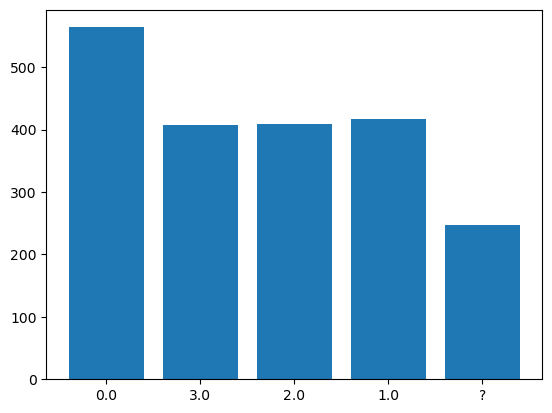

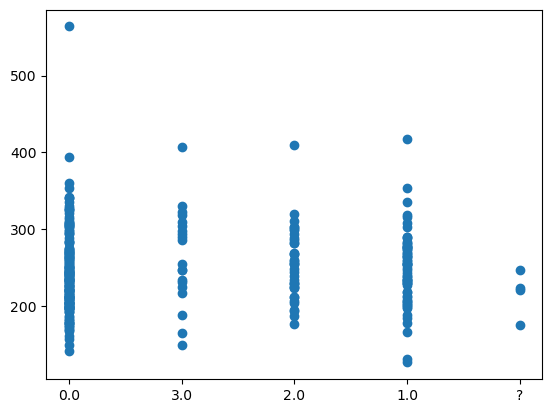

In [43]:
plt.bar(df['ca'], height= df['chol'])
plt.show()
plt.scatter(x = df['ca'], y = df['chol'])
plt.show() 

In [44]:
df['ca'].head(20)

0     0.0
1     3.0
2     2.0
3     0.0
4     0.0
5     0.0
6     2.0
7     0.0
8     1.0
9     0.0
10    0.0
11    0.0
12    1.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: ca, dtype: object

In [45]:
df['thal'].describe()

count     303
unique      4
top       3.0
freq      166
Name: thal, dtype: object

In [46]:
df['thal'].head(20)

0     6.0
1     3.0
2     7.0
3     3.0
4     3.0
5     3.0
6     3.0
7     3.0
8     7.0
9     7.0
10    6.0
11    3.0
12    6.0
13    7.0
14    7.0
15    3.0
16    7.0
17    3.0
18    3.0
19    3.0
Name: thal, dtype: object

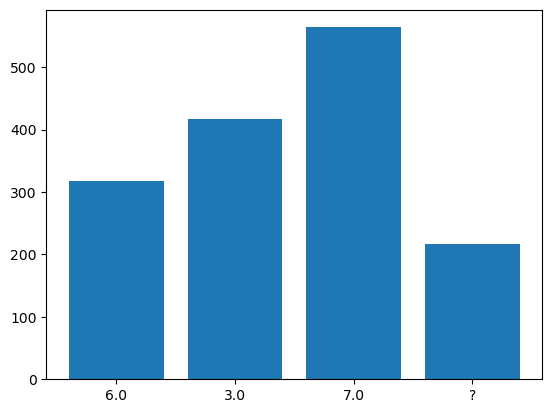

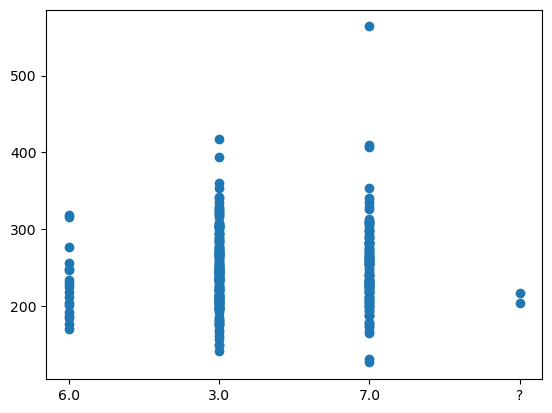

In [47]:
plt.bar(df['thal'], height= df['chol'])
plt.show()
plt.scatter(x = df['thal'], y = df['chol'])
plt.show() 

# Exercise 4 : Handle missing data

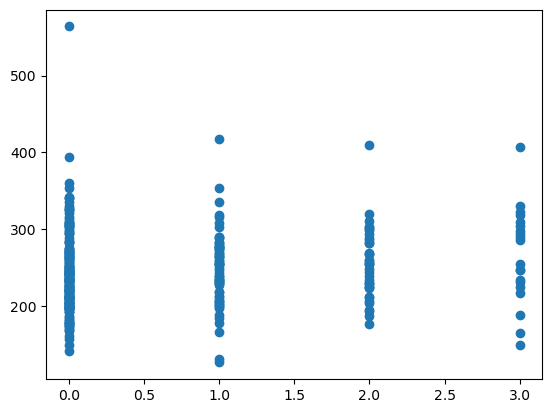

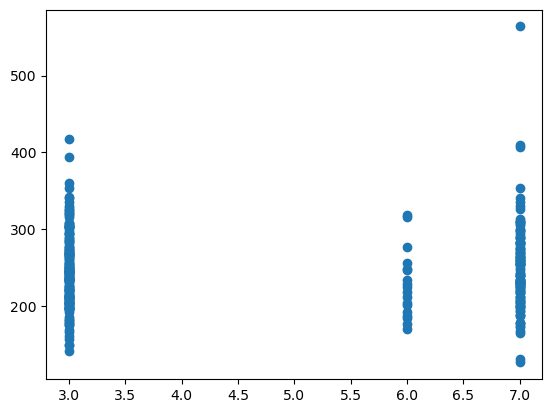

In [48]:
df['ca'] = df['ca'].str.replace('?', '55')
df['thal'] = df['thal'].str.replace('?', '55')

df['ca'] = df['ca'].astype(float)
df['thal'] = df['thal'].astype(float)

df['ca'].replace(55, df['ca'].median(), inplace= True)
df['thal'].replace(55, df['thal'].median(), inplace= True)

plt.scatter(x = df['ca'], y = df['chol'])
plt.show() 
plt.scatter(x = df['thal'], y = df['chol'])
plt.show() 


In [49]:
df['ca']

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302    0.0
Name: ca, Length: 303, dtype: float64

# Exercise 6 : Remove Outliers (If exists)

- Use box plots for some continuous data.

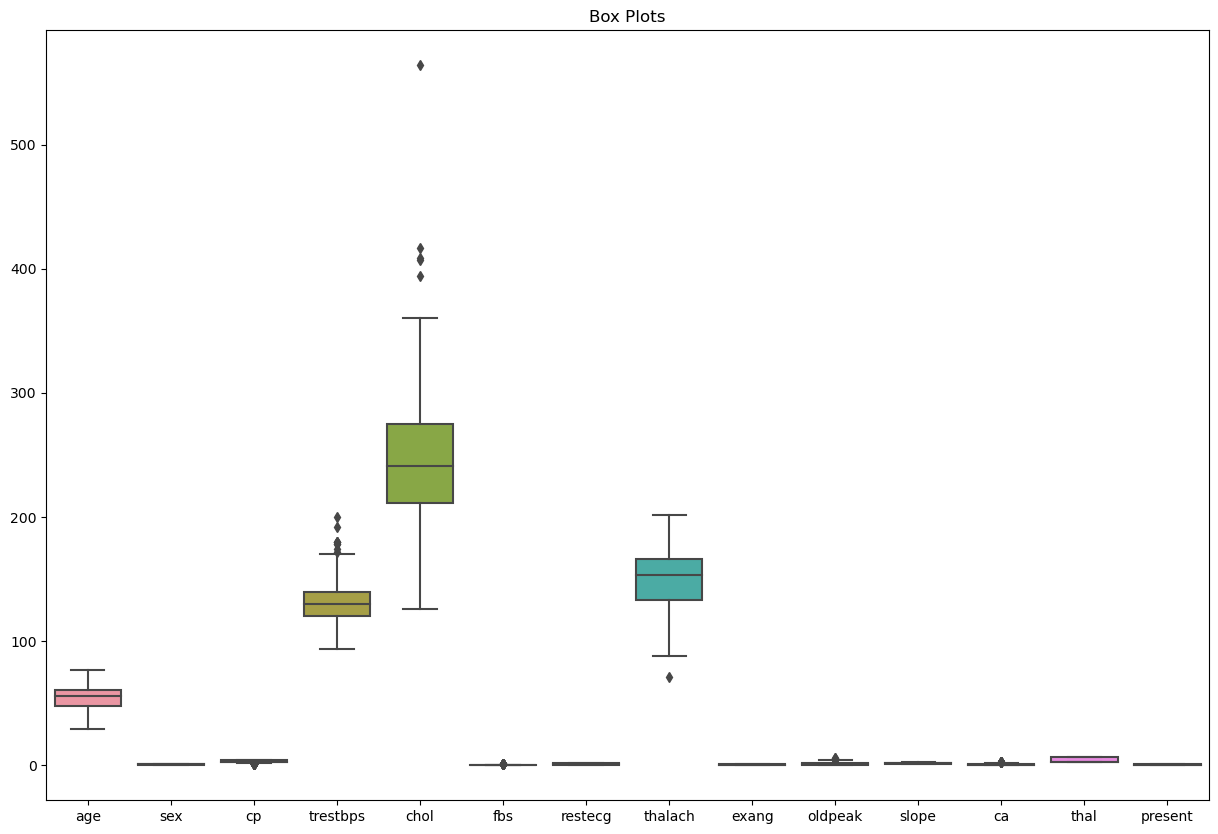

In [50]:
data = [df['age'], df['sex'], df['cp'], df['trestbps'], df['chol'], df['fbs'], df['restecg'], df['thalach'],
       df['exang'], df['oldpeak'], df['slope'], df['ca'], df['thal'], df['present']]

labels = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present']

fig, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(data=data, ax=ax)
ax.set_xticklabels(labels)
ax.set_title('Box Plots')

plt.show()

In [51]:
x = np.percentile(df['trestbps'], 25, interpolation = 'midpoint')
y = np.percentile(df['trestbps'], 75, interpolation = 'midpoint')
z = y - x   
print(f'trestbps :', x - 1.5*(z))
print(f'trestbps :',y + 1.5*(z))

x = np.percentile(df['chol'], 25, interpolation = 'midpoint')
y = np.percentile(df['chol'], 75, interpolation = 'midpoint')
z = y - x   
print(f'chol :',x - 1.5*(z))
print(f'chol :',y + 1.5*(z))

x = np.percentile(df['cp'], 25, interpolation = 'midpoint')
y = np.percentile(df['cp'], 75, interpolation = 'midpoint')
z = y - x   
print(f'cp :',x - 1.5*(z))
print(f'cp :',y + 1.5*(z))

x = np.percentile(df['thalach'], 25, interpolation = 'midpoint')
y = np.percentile(df['thalach'], 75, interpolation = 'midpoint')
z = y - x   
print(f'thalach :',x - 1.5*(z))
print(f'thalach :',y + 1.5*(z))

x = np.percentile(df['oldpeak'], 25, interpolation = 'midpoint')
y = np.percentile(df['oldpeak'], 75, interpolation = 'midpoint')
z = y - x   
print(f'oldpeak :',x - 1.5*(z))
print(f'oldpeak :',y + 1.5*(z))

x = np.percentile(df['ca'], 25, interpolation = 'midpoint')
y = np.percentile(df['ca'], 75, interpolation = 'midpoint')
z = y - x   
print(f'ca :',x - 1.5*(z))
print(f'ca :',y + 1.5*(z))



trestbps : 90.0
trestbps : 170.0
chol : 115.0
chol : 371.0
cp : 1.5
cp : 5.5
thalach : 84.75
thalach : 214.75
oldpeak : -2.4000000000000004
oldpeak : 4.0
ca : -1.5
ca : 2.5


In [52]:
df.drop(df[(df['trestbps'] > 170) | (df['trestbps'] < 90)].index, inplace = True)
df.drop(df[(df['chol'] > 371) | (df['chol'] < 115)].index, inplace = True)
df.drop(df[(df['cp'] > 5.5) | (df['cp'] < 1.5)].index, inplace = True)

df.drop(df[(df['thalach'] > 214.75) | (df['thalach'] < 84.75)].index, inplace = True)
df.drop(df[(df['oldpeak'] > 4) | (df['oldpeak'] < -2.4)].index, inplace = True)
df.drop(df[(df['ca'] > 2.5) | (df['ca'] < -1.5)].index, inplace = True)


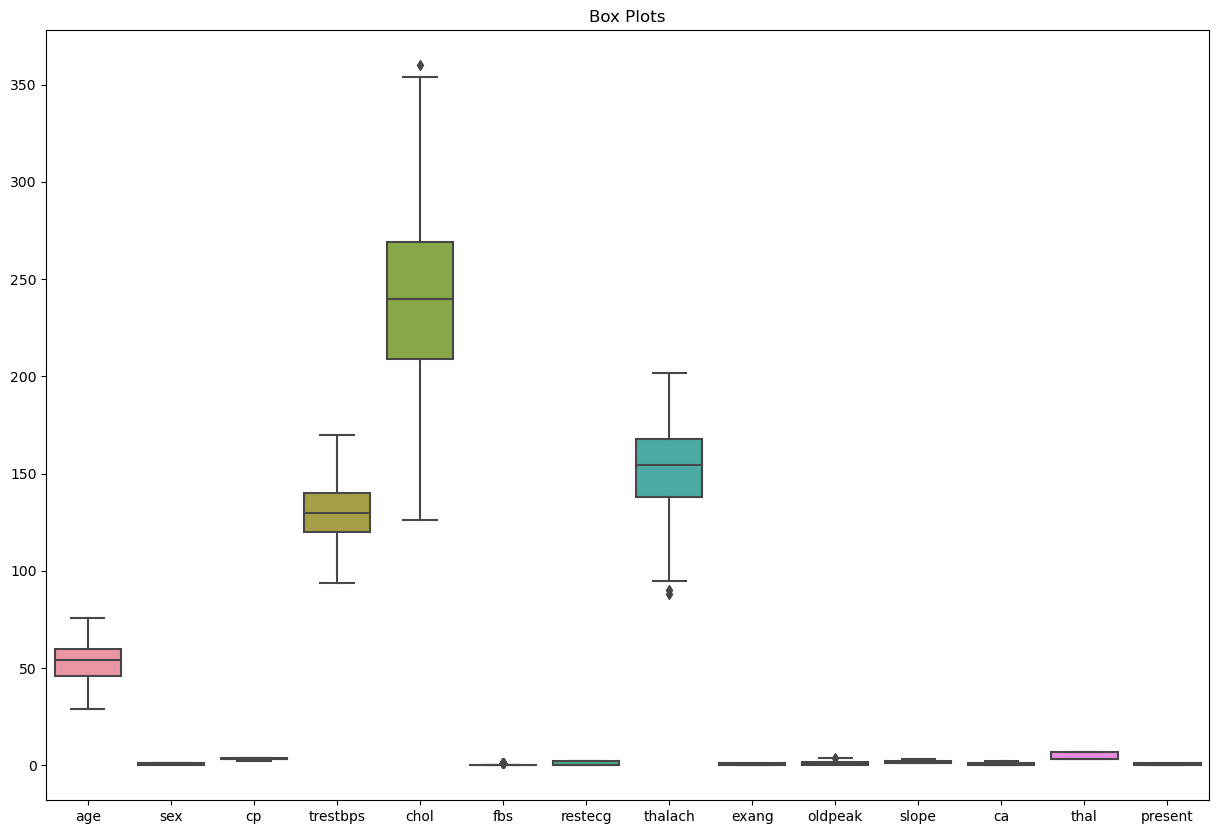

In [53]:
data = [df['age'], df['sex'], df['cp'], df['trestbps'], df['chol'], df['fbs'], df['restecg'], df['thalach'],
       df['exang'], df['oldpeak'], df['slope'], df['ca'], df['thal'], df['present']]

labels = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present']

fig, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(data=data, ax=ax)
ax.set_xticklabels(labels)
ax.set_title('Box Plots')

plt.show()

# Exercise 7 : Feature Selection using Correlation Matrix

1. Calculate the Correlation Matrix.
2. Identify Highly Correlated Features.
    - The threshold is 0.6
3. Remove Highly Correlated Features.

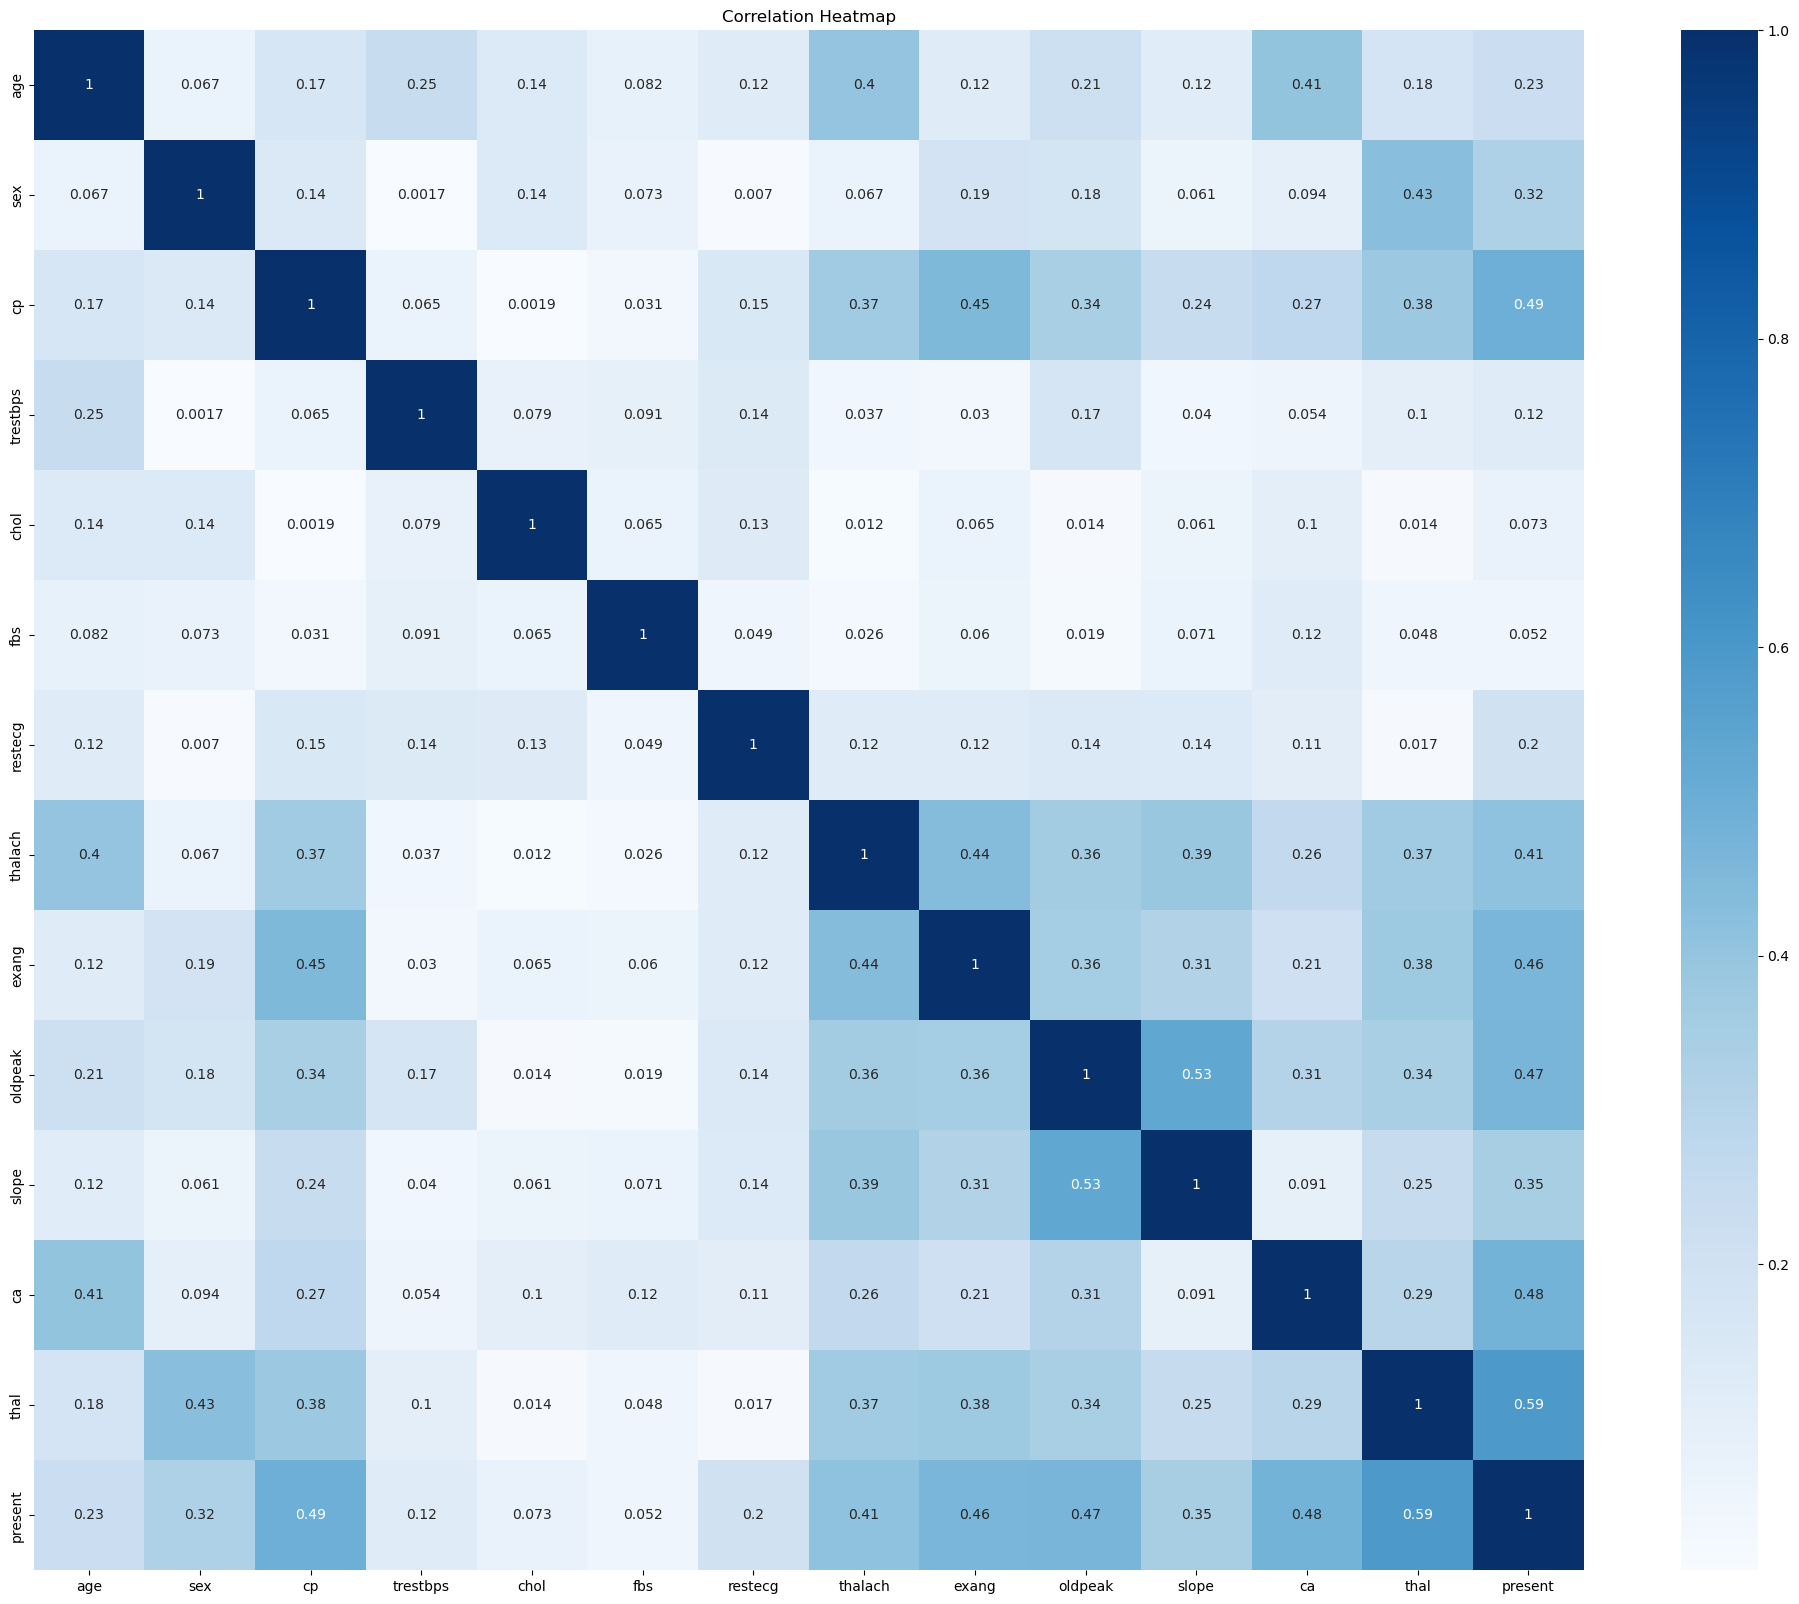

In [54]:
x = df.select_dtypes(include=['number'])
plt.figure(figsize=(25, 20))
sns.heatmap(np.abs(x.corr()), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

# Exercise 8 : X and Y split, then train and test split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x = df.loc[:,['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df.loc[:,['present']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f'test is :', y_test.count(),'train is :', y_train.count())

test is : present    50
dtype: int64 train is : present    196
dtype: int64


# Exercise 9 : Train the model

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

In [58]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)


LogisticRegression()

# Exercise 10 : Evaluate the model

1. Find the score of the training data.
2. Find the scores of the testing data :-
    - Find the accuracy.
    - Find the Sensitivity.
    - Find the Specificity.
    - Find the Sensitivity/Specificity.
    - Find the AUC-ROC.

In [59]:
score = logreg.score(x_train, y_train)
print(score)
score = logreg.score(x_test, y_test)
print(score)

0.9081632653061225
0.8


In [60]:
y_pred = logreg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
sens_spec = sensitivity / specificity
auc_roc = roc_auc_score(y_test, y_pred)

print(f'sensitivity : ', sensitivity)
print(f'specificity : ', specificity)
print(f'sens_spec : ', sens_spec)
print(f'auc_roc : ', auc_roc)

sensitivity :  0.84
specificity :  0.76
sens_spec :  1.1052631578947367
auc_roc :  0.7999999999999999


# Exercise 11 : Find the wights and y intercept

In [61]:
logreg.fit(x, y)
weights = logreg.coef_
y_intercept = logreg.intercept_
print("the weights is : " ,weights)
print("the y intercept is : " ,y_intercept)

the weights is :  [[-0.05173556  0.40742434  0.63928891  0.00431499  0.00178836  0.06958351
   0.35417918 -0.0311365   0.45881362  0.49175014  0.06456563  1.42290935
   0.46650527]]
the y intercept is :  [-0.09026922]


# Exercise 12 : Plot the model complexity

- Is the model overfit? Underfit? Good? Explain

# Exercise 13 : Use Regularizations

1. Build three models with Lasso Regularization and three different lambda values.
2. Build three models with Ridge Regularization and three different lambda values.
3. Build three models with Elastic-net Regularization and three different lambda values.

In general, you need to build 9 models with different Regularizations and different lambda values.

Do not forget to evaluate them (find accuracy, recall, precision, f1 score, AUC-ROC).